 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
snp_path = Path("Resources/sp500_history.csv")
snp = pd.read_csv(snp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
snp = snp.sort_index()
snp.head()

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93

In [9]:
# Check Data Types
snp.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
snp['Close'] = snp['Close'].str.replace('$','')
snp["Close"] = snp["Close"].str.replace(",",'')
snp["Close"] = snp["Close"].astype("float")

<ipython-input-10-37673d3c5a0c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  snp['Close'] = snp['Close'].str.replace('$','')


In [11]:
# Calculate Daily Returns
snp = snp.pct_change()
snp.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [12]:
# Drop nulls
snp.dropna(inplace = True)
snp.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [13]:
# Rename `Close` Column to be specific to this portfolio.
snp = snp.rename(columns = {"Close": "SP500"})
snp.head()

SP500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_df, algo_returns, snp], axis = "columns",join = "inner")
print(df_daily)

In [17]:
df_daily.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

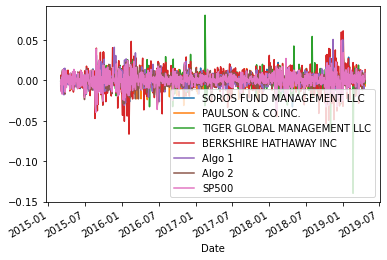

In [18]:
# Plot daily returns of all portfolios
df_daily.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

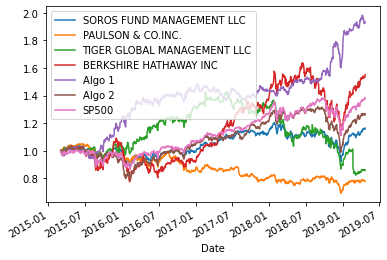

In [22]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cum_returns = (1 + df_daily).cumprod()
cum_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

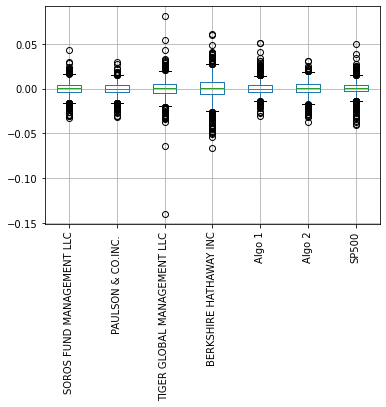

In [27]:
# Box plot to visually show risk
df_daily.boxplot(rot=90)

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios
df_daily.std()


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [42]:
# Calculate  the daily standard deviation of S&P 500
snp_std=df_daily.SP500.std()
# Determine which portfolios are riskier than the S&P 500
df_daily.std()>snp_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)
df_daily.std()*sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

In [44]:
from math import sqrt 

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

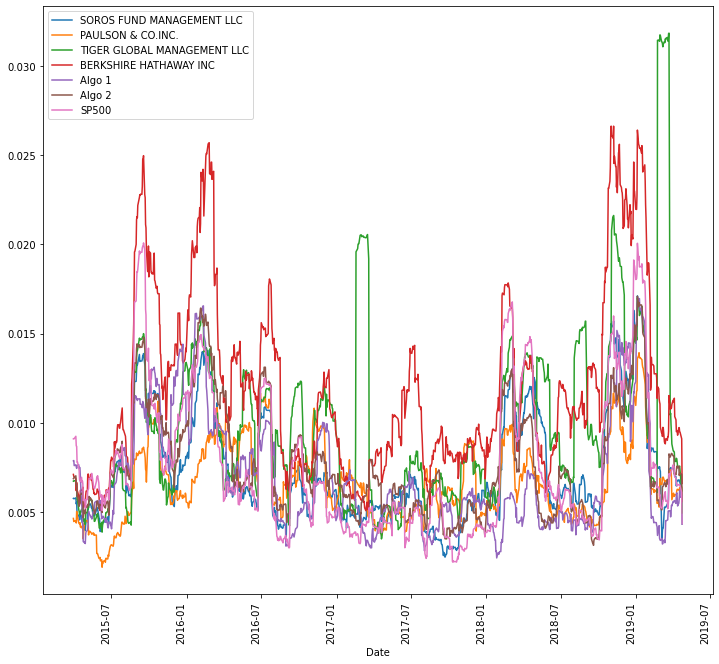

In [54]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_daily.rolling(21).std().plot(figsize=(12,12),rot=90)

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [56]:
# Calculate the correlation
df_daily.corr()
# Display de correlation matrix
df_daily.corr()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
SP500                                         0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
SP500                                           0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
SP500                                      0.751371  0.279494  0.858764   

                                SP500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
SP500                        1.000000

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

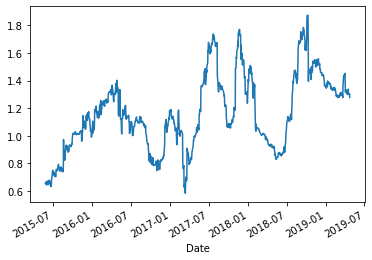

In [72]:
# Calculate covariance of a single portfolio
co_var_soros = df_daily["BERKSHIRE HATHAWAY INC"].rolling(60).cov(df_daily.SP500)


# Calculate variance of S&P 500
SP500_Var = df_daily.SP500.rolling(60).var()
# Computing beta
Beta = co_var_soros/SP500_Var
# Plot beta trend
Beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [75]:
# Use `ewm` to calculate the rolling window
df_daily.ewm(halflife=21).std()

<AxesSubplot:xlabel='Date'>

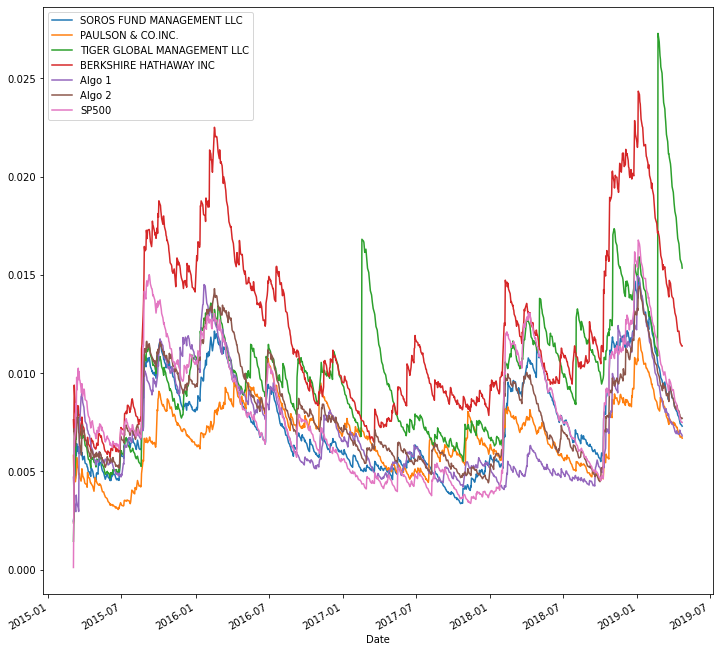

In [79]:
df_daily.ewm(halflife=21).std().plot(figsize=(12,12))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:>

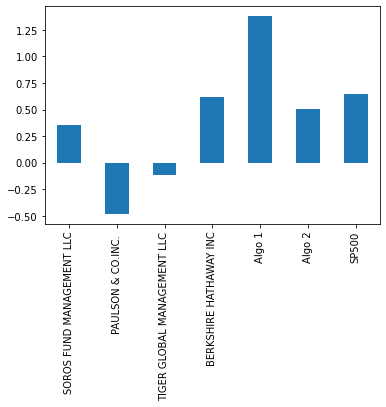

In [104]:
# Annualized Sharpe Ratios
Sharpe_Ratio = (df_daily.mean()/df_daily.std())*252**0.50
Sharpe_Ratio.plot.bar(rot=90)

<AxesSubplot:>

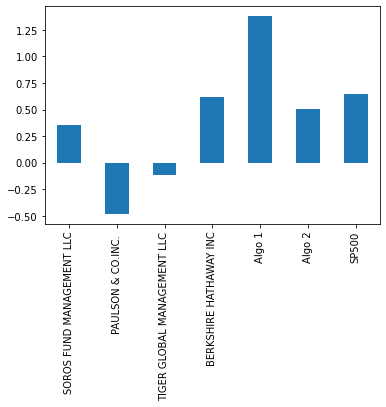

In [105]:
# Visualize the sharpe ratios as a bar plot
Sharpe_Ratio.plot.bar(rot=90)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
Algo #1 outperformes the S&P500 and whales portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [108]:
# Reading data from 1st stock
Google = Path('Resources/goog.csv')
Google

PosixPath('Resources/goog.csv')

In [110]:
Google_df = pd.read_csv(Google, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
Google_df.head()

Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40

In [111]:
# Reading data from 2nd stock
Costco = Path('Resources/cost.csv')
Costco_df = pd.read_csv(Costco, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
Costco_df.head()

Symbol    NOCP
Trade DATE               
2019-05-09   COST  243.47
2019-05-08   COST  241.34
2019-05-07   COST  240.18
2019-05-06   COST  244.23
2019-05-03   COST  244.62

In [113]:
# Reading data from 3rd stock
APPLE = Path('Resources/aapl.csv')
APPLE_df = pd.read_csv(APPLE, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
APPLE_df.head()

Symbol    NOCP
Trade DATE               
2019-05-09   AAPL  200.72
2019-05-08   AAPL  202.90
2019-05-07   AAPL  202.86
2019-05-06   AAPL  208.48
2019-05-03   AAPL  211.75

In [119]:
# Combine all stocks in a single DataFrame
stocks_df = pd.concat([APPLE_df, Costco_df, Google_df], join="inner", axis="rows")
stocks_df.head

<bound method NDFrame.head of            Symbol     NOCP
Trade DATE                
2019-05-09   AAPL   200.72
2019-05-08   AAPL   202.90
2019-05-07   AAPL   202.86
2019-05-06   AAPL   208.48
2019-05-03   AAPL   211.75
...           ...      ...
2018-05-17   GOOG  1078.59
2018-05-16   GOOG  1081.77
2018-05-15   GOOG  1079.23
2018-05-14   GOOG  1100.20
2018-05-11   GOOG  1098.26

[750 rows x 2 columns]>

In [120]:
# Reset Date index
stocks_df.reset_index()

Trade DATE Symbol     NOCP
0   2019-05-09   AAPL   200.72
1   2019-05-08   AAPL   202.90
2   2019-05-07   AAPL   202.86
3   2019-05-06   AAPL   208.48
4   2019-05-03   AAPL   211.75
..         ...    ...      ...
745 2018-05-17   GOOG  1078.59
746 2018-05-16   GOOG  1081.77
747 2018-05-15   GOOG  1079.23
748 2018-05-14   GOOG  1100.20
749 2018-05-11   GOOG  1098.26

[750 rows x 3 columns]

In [127]:
# Reorganize portfolio data by having a column per symbol
Stocks_df2 = pd.pivot_table(stocks_df, values='NOCP', index=['Trade DATE'],
                    columns=['Symbol'])

In [132]:
# Calculate daily returns
Stocks_df2 = Stocks_df2.pct_change()
Stocks_df2
# Drop NAs
Stocks_df2.dropna(inplace = True)
# Display sample data
Stocks_df2

Symbol           AAPL       COST        GOOG
Trade DATE                                  
2018-05-18  -4.708920   0.345712    0.549928
2018-05-21  -3.686073  -0.650955   -0.927480
2018-05-22  -0.878125   0.321458    2.805770
2018-05-23   2.678138 -38.584886    1.174245
2018-05-24  -0.648352  -0.864228    1.013479
...               ...        ...         ...
2019-05-03  39.888024  -2.620644  103.122541
2019-05-06  -0.653202  -0.498267   -0.988237
2019-05-07  -5.192347   2.677124    4.922503
2019-05-08  -0.840949  -1.365093   -0.823761
2019-05-09 -32.408447  -1.508048   -0.121181

[245 rows x 3 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [143]:
# Set weights
weights = [1/3, 1/3, 1/3]
weights_df = Stocks_df2.dot(weights)
# Calculate portfolio return
cum_returns = weights_df
# Display sample data
cum_returns.head()

Trade DATE
2018-05-18    -1.271093
2018-05-21    -1.754836
2018-05-22     0.749701
2018-05-23   -11.577501
2018-05-24    -0.166367
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [144]:
# Join your returns DataFrame to the original returns DataFrame
df_daily['personal_portfolio'] = cum_returns
df_daily.head().dropna()

Empty DataFrame
Columns: [SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. , TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1, Algo 2, SP500, personal_portfolio]
Index: []

In [146]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_daily.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [148]:
# Calculate the annualized `std`
ASD = df_daily.std()*sqrt(252)
ASD

SOROS FUND MANAGEMENT LLC         0.147654
PAULSON & CO.INC.                 0.117522
TIGER GLOBAL MANAGEMENT LLC       0.234352
BERKSHIRE HATHAWAY INC            0.248699
Algo 1                            0.134522
Algo 2                            0.140593
SP500                             0.153120
personal_portfolio             3447.401477
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

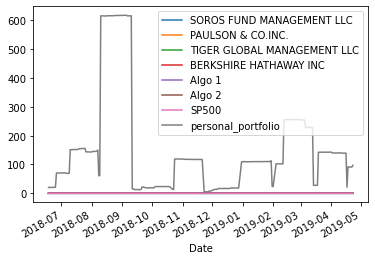

In [154]:
# Calculate rolling standard deviation
df_daily.rolling(21).std()
# Plot rolling standard deviation
df_daily.rolling(21).std().plot()

### Calculate and plot the correlation

In [155]:
# Calculate and plot the correlation
df_daily.corr()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791908   
PAULSON & CO.INC.                             0.791908            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.477772            0.485432   
BERKSHIRE HATHAWAY INC                        0.818330            0.652147   
Algo 1                                        0.339787            0.365394   
Algo 2                                        0.864576            0.783702   
SP500                                         0.878068            0.767410   
personal_portfolio                            0.065684            0.073769   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.477772   
PAULSON & CO.INC.                               0.485432   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.324820   
Algo 1                                          0.114040   
Algo 2                                          0.410340   
SP500                                           0.480721   
personal_portfolio                              0.044755   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.818330  0.339787  0.864576   
PAULSON & CO.INC.                          0.652147  0.365394  0.783702   
TIGER GLOBAL MANAGEMENT LLC                0.324820  0.114040  0.410340   
BERKSHIRE HATHAWAY INC                     1.000000  0.326548  0.785426   
Algo 1                                     0.326548  1.000000  0.369748   
Algo 2                                     0.785426  0.369748  1.000000   
SP500                                      0.851954  0.289825  0.877325   
personal_portfolio                         0.114032  0.045146  0.033644   

                                SP500  personal_portfolio  
SOROS FUND MANAGEMENT LLC    0.878068            0.065684  
PAULSON & CO.INC.            0.767410            0.073769  
TIGER GLOBAL MANAGEMENT LLC  0.480721            0.044755  
BERKSHIRE HATHAWAY INC       0.851954            0.114032  
Algo 1                       0.289825            0.045146  
Algo 2                       0.877325            0.033644  
SP500                        1.000000            0.050125  
personal_portfolio           0.050125            1.000000

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

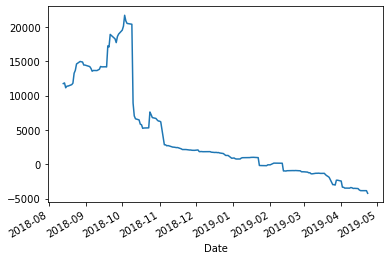

In [157]:
# Calculate and plot Beta
co_var_soros = df_daily["personal_portfolio"].rolling(60).cov(df_daily.SP500)


# Calculate variance of S&P 500
SP500_Var = df_daily.SP500.rolling(60).var()
# Computing beta
Beta = co_var_soros/SP500_Var
# Plot beta trend
Beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [159]:
# Calculate Annualzied Sharpe Ratios
Sharpe_Ratio = (personal_portfolio.mean()/personal_portfolio.std())*252**0.50
Sharpe_Ratio


NameError: name 'personal_portfolio' is not defined

<AxesSubplot:>

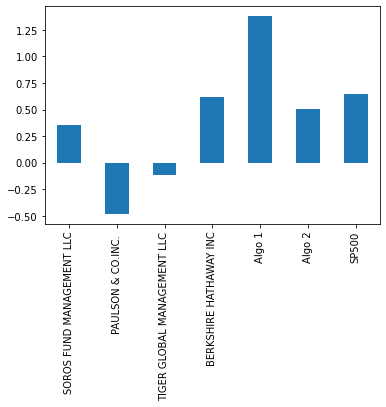

In [160]:
# Visualize the sharpe ratios as a bar plot
Sharpe_Ratio.plot.bar(rot=90)

### How does your portfolio do?

Write your answer here!

In [ ]:
Not very well.. 